# importing required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# importing the dataset

In [2]:
dataset = pd.read_csv('QualityPrediction.csv')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Correlations between predictors and target variable

In [87]:
correlations = dataset.corr()
correlations = correlations['quality'].sort_values(ascending = False)
correlations

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
quality class          -0.778860
Name: quality, dtype: float64

# missing value treatment

In [88]:
dataset_missing = pd.isna(dataset).sum()
dataset_missing

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality class           0
dtype: int64

# Preparing predictors

In [4]:
X= dataset[list(dataset.columns)[:-1]]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
Y = dataset['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Studying the distribution of dependent and independent variables

<AxesSubplot:xlabel='quality', ylabel='Density'>

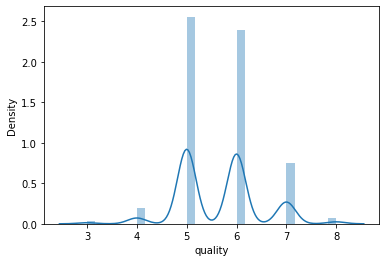

In [6]:
sns.distplot(Y)
#From the plot below it is clear that the popularity of medium quality wine 5 and 6 is high and the data seems to normally distributed

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

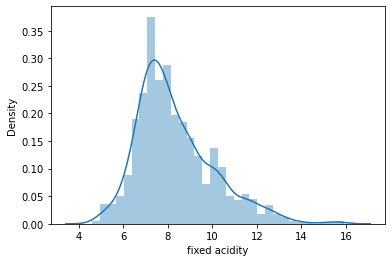

In [7]:
sns.distplot(dataset['fixed acidity'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

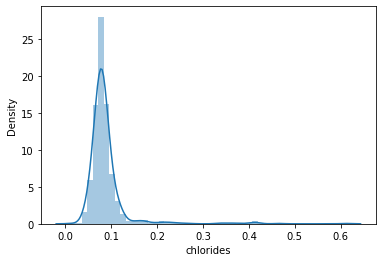

In [8]:
sns.distplot(dataset['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

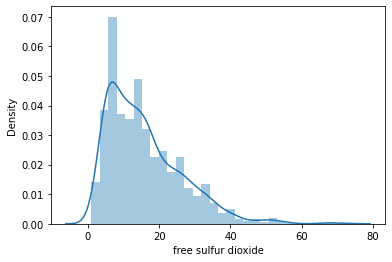

In [9]:
sns.distplot(dataset['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

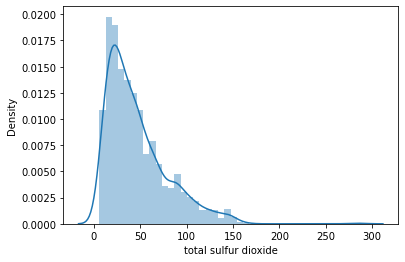

In [10]:
sns.distplot(dataset['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

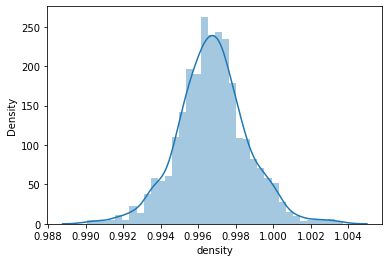

In [11]:
sns.distplot(dataset['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

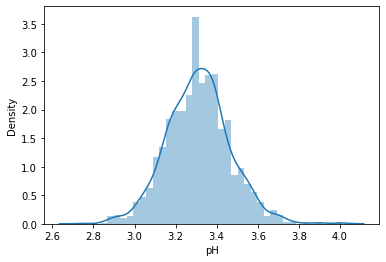

In [12]:
sns.distplot(dataset['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

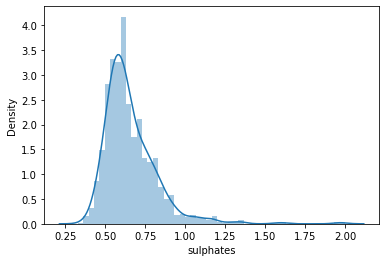

In [13]:
sns.distplot(dataset['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

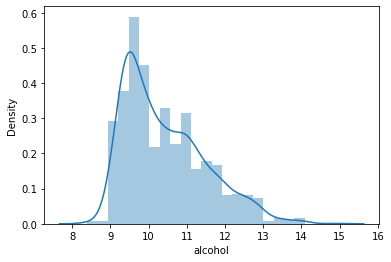

In [14]:
sns.distplot(dataset['alcohol'])

# Plotting the interaction between independent and dependent variable

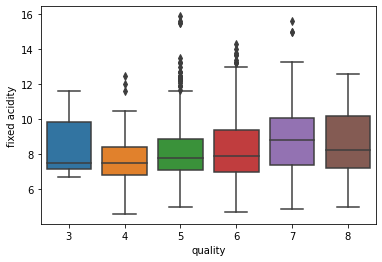

In [15]:
sns.boxplot(x = "quality", y = "fixed acidity", data = dataset)
plt.show()

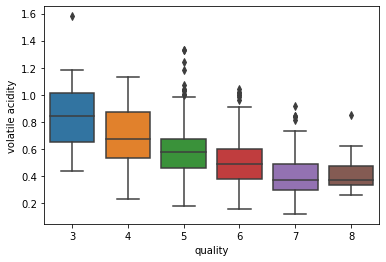

In [16]:
sns.boxplot(x = "quality", y = "volatile acidity", data = dataset)
plt.show()

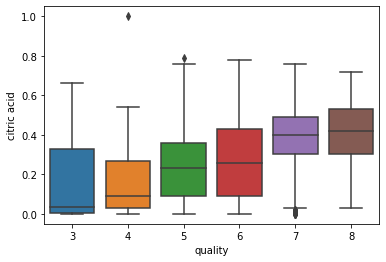

In [17]:
sns.boxplot(x = "quality", y = "citric acid", data = dataset)
plt.show()
#From the plot below it is clear that higher the citric acid, higher is the quality

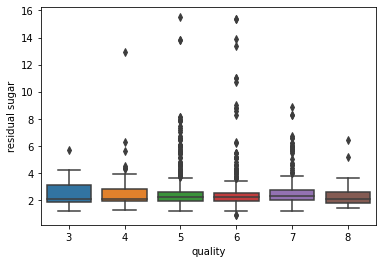

In [18]:
sns.boxplot(x = "quality", y = "residual sugar", data = dataset)
plt.show()
#from the plot below it is clear that there is not much influence of residual sugar on quality of the wine

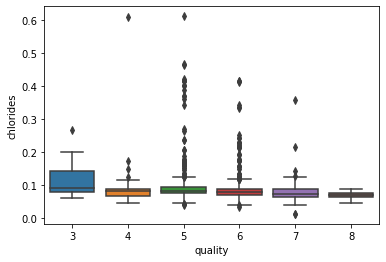

In [19]:
sns.boxplot(x = "quality", y = "chlorides", data = dataset)
plt.show()
#from the plot below it is clear that there is not much influence of chlorides on quality of the wine

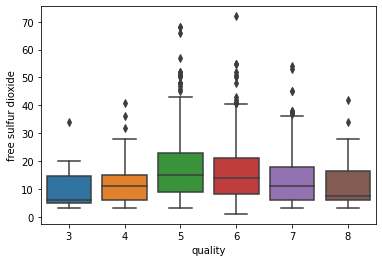

In [20]:
sns.boxplot(x = "quality", y = "free sulfur dioxide", data = dataset)
plt.show()

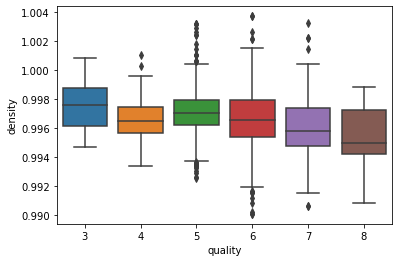

In [21]:
sns.boxplot(x = "quality", y = "density", data = dataset)
plt.show()
#From the plot below it is clear that lower the density, lower is the quality

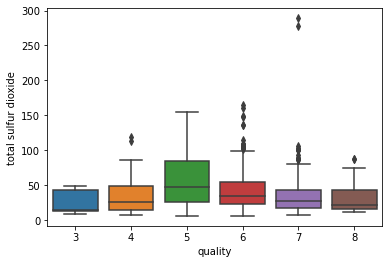

In [22]:
sns.boxplot(x = "quality", y = "total sulfur dioxide", data = dataset)
plt.show()
#from the plot below it is clear that there is not much influence of total sulphur-dioxide on quality of the wine

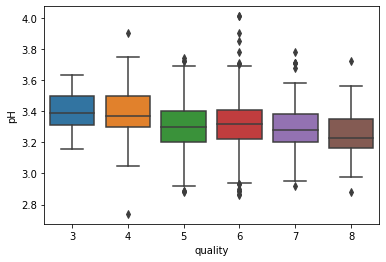

In [23]:
sns.boxplot(x = "quality", y = "pH", data = dataset)
plt.show()
# Similar to density, pH also has the negative influence on the quality

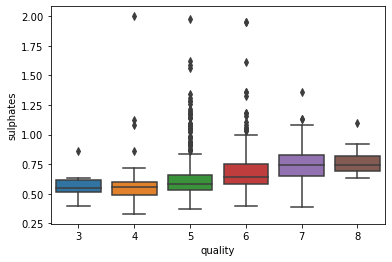

In [24]:
sns.boxplot(x = "quality", y = "sulphates", data = dataset)
plt.show()
# sulphates have the positive influence on the quality of the wine.

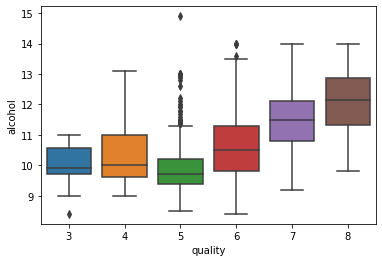

In [25]:
sns.boxplot(x = "quality", y = "alcohol", data = dataset)
plt.show()
# Alchohol presence has the positive influence on the quality of the wine.

# selecting the right independent variables using variance inflation factor (VIF)

In [26]:
x = dataset.drop(["residual sugar","chlorides","quality"], axis =1)
vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print(vif)

               features   vif_Factor
0         fixed acidity    69.087163
1      volatile acidity    15.628643
2           citric acid     8.465221
3   free sulfur dioxide     6.362147
4  total sulfur dioxide     6.346131
5               density  1357.991421
6                    pH  1018.422727
7             sulphates    18.338134
8               alcohol   116.213979


In [27]:
x = dataset.drop(["residual sugar","chlorides","quality", "density", "pH"], axis =1)
vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print(vif)

               features  vif_Factor
0         fixed acidity   37.191298
1      volatile acidity   13.762308
2           citric acid    8.063072
3   free sulfur dioxide    6.288495
4  total sulfur dioxide    5.916127
5             sulphates   17.134544
6               alcohol   34.839329


In [28]:
x = dataset.drop(["residual sugar","chlorides","quality", "density", "pH","fixed acidity","free sulfur dioxide"], axis =1)
vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print(vif)
# From the correlation matrix these are our top 5 variables that could influence the quality of our wine so let's try to apply the model in the next step

               features  vif_Factor
0      volatile acidity   10.951301
1           citric acid    4.264216
2  total sulfur dioxide    3.015320
3             sulphates   16.712657
4               alcohol   27.200633


In [30]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [79]:
X= dataset[['citric acid','sulphates','alcohol','volatile acidity','density','pH']]
X

,citric acid,sulphates,alcohol,volatile acidity,density,pH
0,0.00,0.56,9.4,0.700,0.99780,3.51
1,0.00,0.68,9.8,0.880,0.99680,3.20
2,0.04,0.65,9.8,0.760,0.99700,3.26
3,0.56,0.58,9.8,0.280,0.99800,3.16
4,0.00,0.56,9.4,0.700,0.99780,3.51
...,...,...,...,...,...,...
1594,0.08,0.58,10.5,0.600,0.99490,3.45
1595,0.10,0.76,11.2,0.550,0.99512,3.52
1596,0.13,0.75,11.0,0.510,0.99574,3.42
1597,0.12,0.71,10.2,0.645,0.99547,3.57


In [80]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 1/3, random_state = 16)

In [81]:
#Instantiating and fitting the model to training Dataset
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [82]:
print('R-score is %s'%regressor.score(x_test,y_test))

R-score is 0.2896113534416763


In [83]:
regressor = LinearRegression()
scores = cross_val_score(regressor,X,Y,cv=5)
print(scores.mean())

0.2713047555358953


In [84]:
print(scores)

[0.06003496 0.29938823 0.34551857 0.36065614 0.29092588]


In [85]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [86]:
accuracy = regressor.score(x_test, y_test)
print("Accuracy: {}%".format(int(round(accuracy*100))))

Accuracy: 29%


# From linear regression accuracy is around 29%

In [40]:
train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test)
print(test_pred)

[4.21900511 5.09471596 6.49961151 ... 5.71213915 5.46021215 5.60073467]
[5.45891191 5.01358509 4.80216781 6.0351731  5.8118532  5.44096757
 5.74685226 5.35398145 5.12688738 5.74925479 6.36695833 6.15759756
 5.87926332 6.25638821 6.35260787 6.02388014 5.64363322 5.92219734
 5.28892894 6.19759419 5.16059496 4.69194578 6.16080558 6.03809661
 6.46871372 5.33797738 5.34218916 5.47965729 5.18371425 6.49961151
 5.74685226 6.15808689 5.58379896 5.69562657 6.08535249 5.1588673
 5.27894657 5.66897861 4.94759177 5.67349785 5.65849835 6.46871372
 5.30286021 5.07449161 5.99310169 6.38087982 5.12362391 5.81782207
 6.52886287 5.38093051 5.04588065 6.03314642 5.01730972 5.61029246
 6.34766991 6.18867018 5.14665033 5.13292684 5.49594218 5.27069403
 5.84652363 5.67745815 6.06810917 6.36152408 5.37472874 6.21843721
 5.74645123 5.41757133 5.40471835 6.67058347 5.71813915 4.88738202
 5.14910721 5.15644969 5.39323769 4.96783079 6.29047557 5.43879701
 6.41973445 6.14940573 6.21917343 5.75497658 6.96469598 6.

In [41]:
#calculation RMSE
train_rmse = metrics.mean_squared_error(train_pred, y_train)**0.5
print(train_rmse)
test_rmse = metrics.mean_squared_error(test_pred, y_test)**0.5
print(test_rmse)

0.6454546911435745
0.6731363438549238


In [42]:
print('predicted data = ',np.round_(test_pred))

predicted data =  [5. 5. 5. 6. 6. 5. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 5. 5. 6. 6.
 6. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6. 5. 6. 6. 6. 5. 5. 6. 6. 5. 6.
 7. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 5. 6. 6. 6. 6. 5. 6. 6. 5. 5. 7. 6. 5.
 5. 5. 5. 5. 6. 5. 6. 6. 6. 6. 7. 6. 6. 5. 6. 6. 5. 5. 5. 5. 5. 6. 7. 6.
 7. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5. 7. 6. 5.
 5. 6. 6. 5. 5. 5. 5. 6. 5. 6. 6. 6. 5. 7. 6. 5. 6. 6. 5. 5. 5. 6. 6. 5.
 6. 6. 6. 5. 5. 5. 6. 5. 5. 6. 5. 6. 6. 5. 6. 6. 5. 6. 6. 6. 6. 6. 6. 7.
 5. 6. 6. 5. 6. 5. 7. 6. 5. 5. 6. 6. 5. 5. 5. 6. 5. 6. 6. 5. 4. 6. 6. 6.
 5. 6. 6. 6. 5. 6. 5. 6. 6. 4. 5. 6. 5. 6. 5. 5. 5. 5. 6. 5. 5. 6. 6. 6.
 5. 5. 5. 5. 6. 7. 6. 6. 6. 5. 6. 6. 6. 5. 6. 6. 7. 6. 6. 5. 5. 5. 6. 6.
 6. 6. 5. 5. 5. 7. 6. 6. 5. 6. 5. 6. 6. 7. 6. 6. 5. 6. 6. 6. 7. 5. 5. 6.
 7. 6. 7. 5. 5. 6. 5. 6. 5. 5. 6. 5. 5. 7. 5. 5. 6. 6. 6. 5. 6. 5. 6. 5.
 6. 5. 5. 6. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 6. 6. 6. 5. 6. 6. 6.
 6. 6. 6. 5. 7. 5. 5. 5. 6. 6. 5.

# Lets try to use the Random Forest Model

In [43]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [44]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

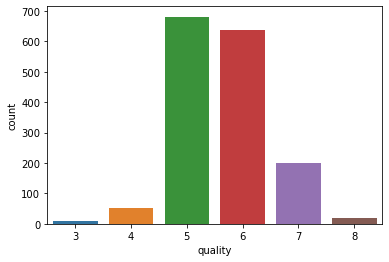

In [45]:
sns.countplot(x='quality', data = dataset)

In [ ]:
# Minimum is 3 and maximum is 8, we can create 3 types of wine quality based on the ratings as low, med, and high
# if quality < 5 - low quality
# if quality = 5 - med quality
# if quality > 5 - high quality

In [46]:
def classify(quality):
    if quality<5:
        return 'low quality'
    elif quality==5:
        return 'medium quality'
    else:
        return 'high quality'

dataset['quality class'] = dataset['quality'].apply(classify)

<AxesSubplot:xlabel='quality class', ylabel='count'>

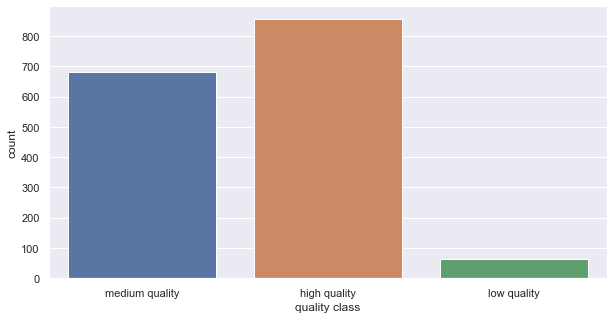

In [47]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x = 'quality class', data= dataset)

In [89]:
# Use LabelEncoder for the categorical values
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()
dataset['quality class'] = le.fit_transform(dataset['quality class'])
dataset['quality class'].dtypes

dtype('int64')

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
x_train,x_test,y_train,y_test = train_test_split(dataset.drop(['quality class','quality'],axis = 1), dataset['quality class'], test_size = 0.4)

In [93]:
rfc = RandomForestClassifier(n_estimators = 200)

In [94]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [95]:
pred = rfc.predict(x_test)

In [96]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       347
           1       0.06      0.67      0.11         3
           2       0.78      0.71      0.74       290

    accuracy                           0.76       640
   macro avg       0.55      0.73      0.56       640
weighted avg       0.79      0.76      0.78       640



In [97]:
print(confusion_matrix(pred,y_test))

[[278  10  59]
 [  1   2   0]
 [ 63  20 207]]


#From Random Forest model accuracy is about 76%

# Now lets try to implement "Support Vector Classifier" as our model.

In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [99]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [100]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.60      0.89      0.72       342
           1       0.00      0.00      0.00        32
           2       0.68      0.33      0.45       266

    accuracy                           0.62       640
   macro avg       0.43      0.41      0.39       640
weighted avg       0.60      0.62      0.57       640



# SVC model gets 62% as the accuracy

# Let me try to increace the accuracy of my model by implementing Grid Search CV

In [60]:
tuned_parameter = {
    'C': (np.arange(0.01,1,0.01)),'kernel': ['linear'],
    'C': (np.arange(0.01,1,0.01)),'gamma':[0.01,0.02,0.03,0.04,0.05],'kernel':['rbf'],
    'degree':[2,3,4,5],'gamma':[0.01,0.02,0.03,0.04,0.05],'C':(np.arange(0.01,1,0.01)),'kernel':['poly']
}

In [61]:
model_svm = GridSearchCV(svc, tuned_parameter, cv=10, scoring = 'accuracy')

In [1]:
model_svm.fit(x_train, y_train)

In [ ]:
print(model_svm.best_score)

In [ ]:
print(model_svm.best_params_)